In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
train_ds="/kaggle/input/gender-classification-dataset/Training"
test_ds="/kaggle/input/gender-classification-dataset/Validation"

# Data preprocessing
****

In [6]:
root_path = "/kaggle/input/gender-classification-dataset/Training/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [7]:
os.listdir('/kaggle/input/gender-classification-dataset/Training')

['female', 'male']

In [8]:
import plotly.express as px

In [9]:
fig = px.pie(names=class_names, values=class_dis,
             title="Training Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [10]:
valid_path = "/kaggle/input/gender-classification-dataset/Validation/"
valid_dis = [len(os.listdir(valid_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [13]:
batch_size=32
img_size=224

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  
test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [15]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [16]:
img= train_generator[0]
print(img)

(array([[[[0.10980393, 0.08627451, 0.08627451],
         [0.10980393, 0.08627451, 0.08627451],
         [0.10980393, 0.08627451, 0.08627451],
         ...,
         [0.03529412, 0.02745098, 0.03137255],
         [0.03529412, 0.02745098, 0.03137255],
         [0.03529412, 0.02745098, 0.03137255]],

        [[0.10006426, 0.08302796, 0.0797814 ],
         [0.10006426, 0.08302796, 0.0797814 ],
         [0.10006426, 0.08302796, 0.0797814 ],
         ...,
         [0.02880101, 0.02095787, 0.02487944],
         [0.02880101, 0.02095787, 0.02487944],
         [0.02880101, 0.02095787, 0.02487944]],

        [[0.09803922, 0.08235294, 0.07843138],
         [0.09803922, 0.08235294, 0.07843138],
         [0.09803922, 0.08235294, 0.07843138],
         ...,
         [0.02745098, 0.01960784, 0.02352941],
         [0.02745098, 0.01960784, 0.02352941],
         [0.02745098, 0.01960784, 0.02352941]],

        ...,

        [[0.65882355, 0.37647063, 0.2784314 ],
         [0.65882355, 0.37647063, 0.2784314 

In [17]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [18]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


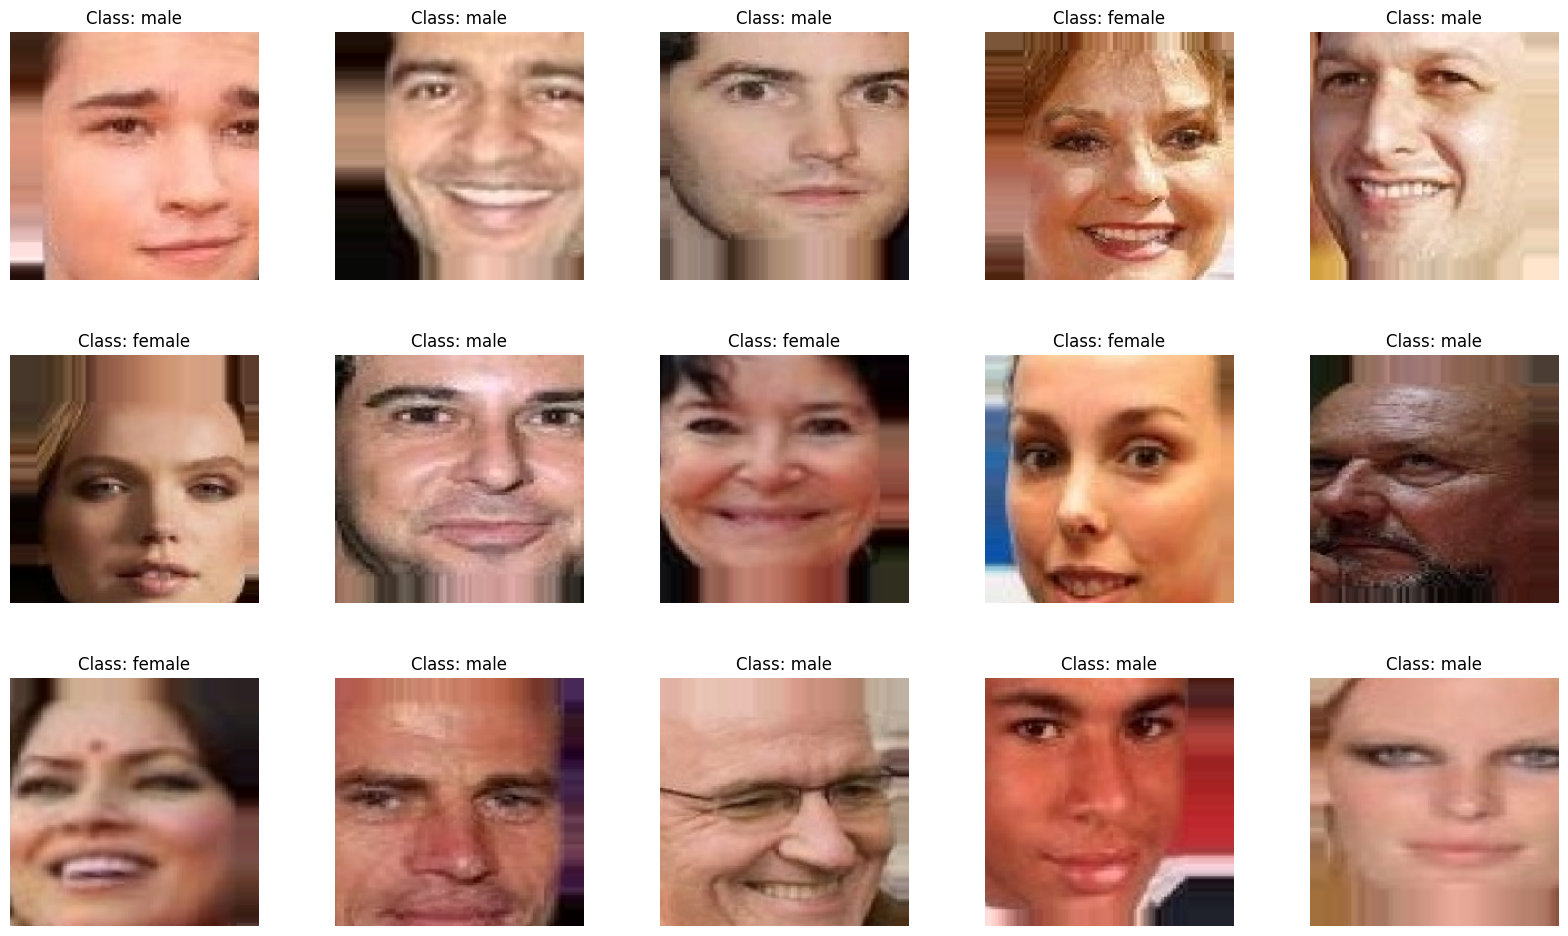

In [25]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [19]:
print(len(train_generator))
print(len(test_ds))

1470
54


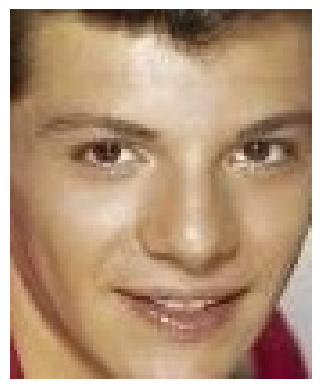

In [24]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/gender-classification-dataset/Training/male/090579.jpg.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
from keras.layers import MaxPool2D

# Build MobileNet Model

In [26]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

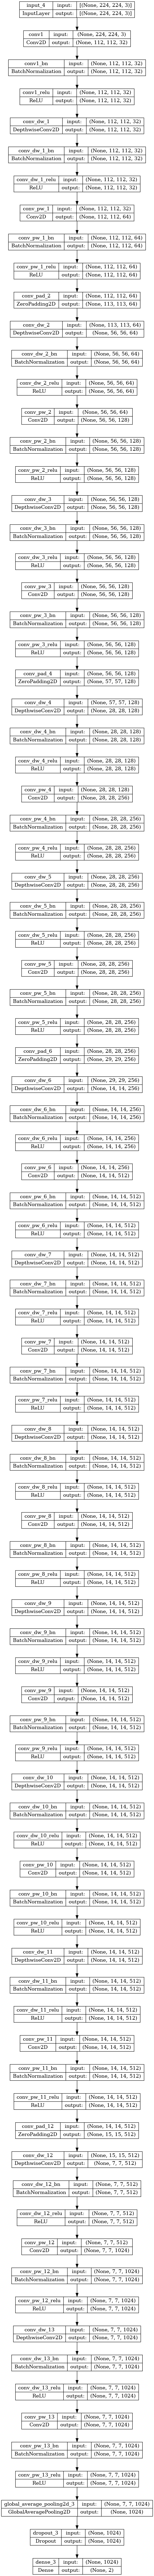

In [36]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes = 11

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [37]:
model = mobilenet((224, 224, 3))

In [38]:
# Print the model summary

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [40]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [41]:
history =model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
1470/1470 [==============================] - 836s 566ms/step - loss: 0.3864 - accuracy: 0.8429 - val_loss: 0.1396 - val_accuracy: 0.9489
Epoch 2/10
1470/1470 [==============================] - 601s 409ms/step - loss: 0.2209 - accuracy: 0.9234 - val_loss: 0.1225 - val_accuracy: 0.9570
Epoch 3/10
1470/1470 [==============================] - 585s 398ms/step - loss: 0.1879 - accuracy: 0.9343 - val_loss: 0.1059 - val_accuracy: 0.9630
Epoch 4/10
1470/1470 [==============================] - 582s 396ms/step - loss: 0.1629 - accuracy: 0.9452 - val_loss: 0.1084 - val_accuracy: 0.9644
Epoch 5/10
1470/1470 [==============================] - 573s 390ms/step - loss: 0.1518 - accuracy: 0.9471 - val_loss: 0.0937 - val_accuracy: 0.9681
Epoch 6/10
1470/1470 [==============================] - 565s 385ms/step - loss: 0.1427 - accuracy: 0.9498 - val_loss: 0.1009 - val_accuracy: 0.9685
Epoch 7/10
1470/1470 [==============================] - 561s 382ms/step - loss: 0.1311 - accuracy: 0.9542 - val_

In [45]:
n_categories = len(os.listdir('/kaggle/input/gender-classification-dataset/Validation'))# number of categories print(n_categories)

In [46]:
n_categories

2

In [47]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.386370,0.842860,0.139592,0.948923
1,0.220884,0.923440,0.122486,0.956992
2,0.187865,0.934289,0.105911,0.963001
3,0.162892,0.945223,0.108418,0.964375
4,0.151766,0.947095,0.093652,0.968066


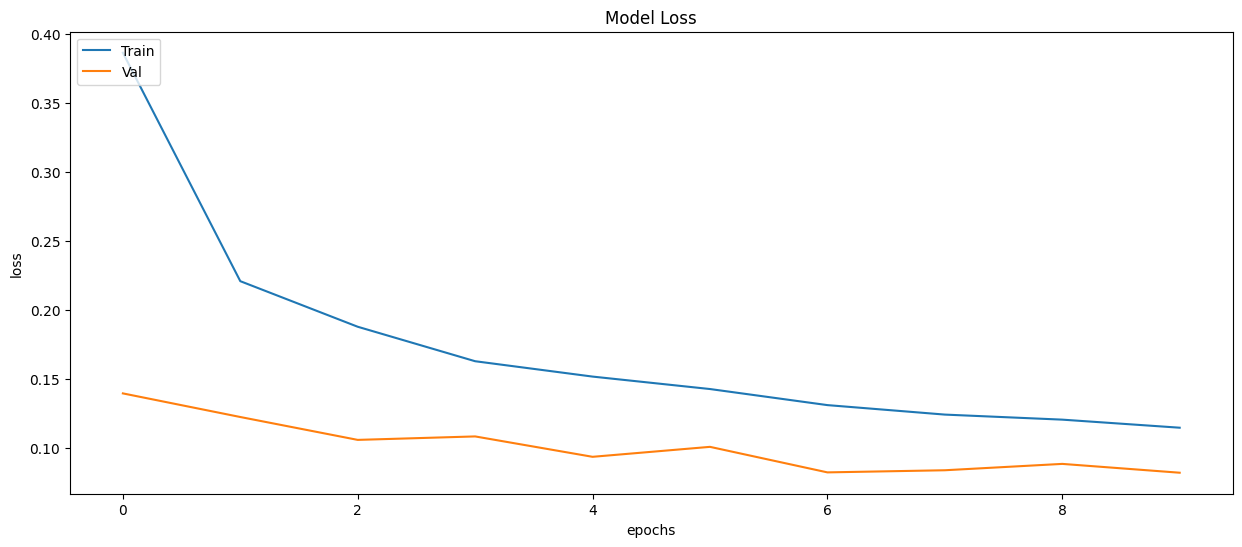

In [48]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

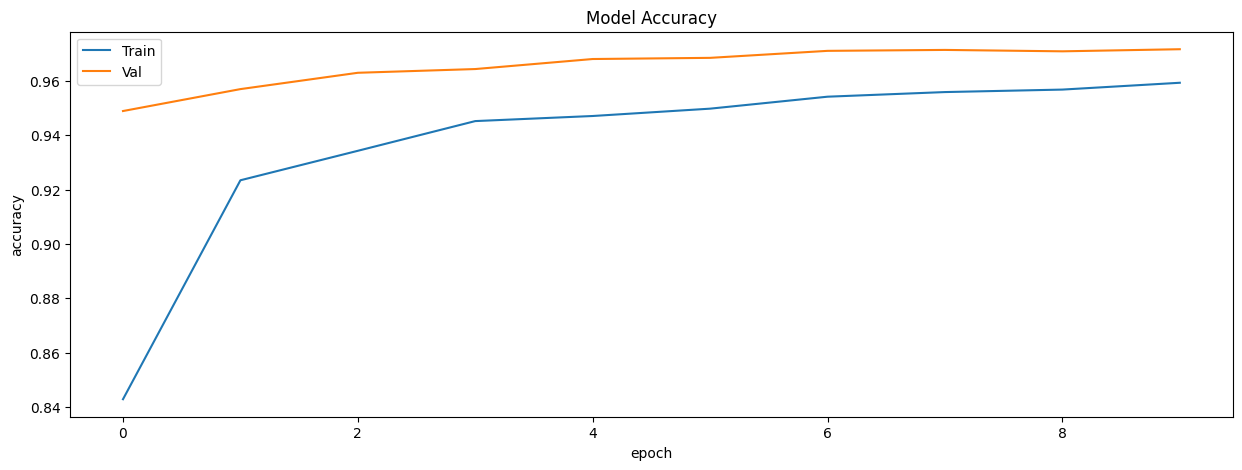

In [50]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [51]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

365/365 [==============================] - 30s 80ms/step


In [52]:
results =model.evaluate(test_generator)

365/365 [==============================] - 25s 68ms/step - loss: 0.0821 - accuracy: 0.9717


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5841
           1       0.99      0.96      0.97      5808

    accuracy                           0.97     11649
   macro avg       0.97      0.97      0.97     11649
weighted avg       0.97      0.97      0.97     11649



Thank You !